# EMPLOYMENT PRODUCTIVITY PREDICTOR
A model to predict the productivity of employees using a Random Forest Regressor

## OVERVIEW
The garment industry is one of the most dominating industries in this era of industrial globalization. It is a highly labor-intensive industry that requires a large number of human resources to produce its goods and fill up the global demand for garment products. Because of the dependency on human labor, the production of a garment company comprehensively relies on the productivity of the employees who are working in different departments of the company. A common problem in this industry is that the actual productivity of the garment employees sometimes does not meet the targeted productivity that was set for them by the authorities to meet the production goals in due time. When the productivity gap occurs, the company faces a huge loss in production.
I devised a Machine Learning model that helps us to track, analyse and predict the productivity performance of the employees in their factories thereby helping  the manufacturers to set an accurate target, minimize the production loss and maximize the profit. 

## Dataset Description
This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.
day : Day of the Week

quarter : A portion of the month. A month was divided into four quarters

department : Associated department with the instance

team_no : Associated team number with the instance

no_of_workers : Number of workers in each team

no_of_style_change : Number of changes in the style of a particular product

targeted_productivity : Targeted productivity set by the Authority for each team for each day.

smv : Standard Minute Value, it is the allocated time for a task

wip : Work in progress. Includes the number of unfinished items for products

over_time : Represents the amount of overtime by each team in minutes

incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

idle_time : The amount of time when the production was interrupted due to several reasons

idle_men : The number of workers who were idle due to production interruption

actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [1]:
#importing all the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
from sklearn import model_selection as mdsel
from sklearn import metrics as mtr

In [4]:
#loading the dataset
empl=pd.read_csv(r'E:\productivity_train.csv')
empl.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
0,9,0.75,3.94,NaN,960,0,0.0,0,0,8.0,...,1,0,0,0,0,0,0,0,1,0.755167
1,7,0.65,30.10,909.0,7080,0,0.0,0,1,59.0,...,0,0,1,0,0,0,1,0,0,0.535678
2,3,0.80,4.15,NaN,1440,0,0.0,0,0,7.0,...,0,1,0,0,0,0,0,0,1,0.820833
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42.0,...,0,0,1,0,0,0,0,0,1,0.581131
4,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,...,0,0,1,1,0,0,0,0,0,0.790003


In [5]:
empl.shape

(1017, 26)

In [6]:
#Beginning data exploration and data cleaning
empl.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
count,1017.000000,1017.000000,1017.000000,594.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,...,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,6.443461,0.730747,15.150492,1183.183502,4532.940020,40.689282,0.564405,0.398230,0.160275,34.846116,...,0.201573,0.214356,0.584071,0.161259,0.152409,0.164208,0.165192,0.171091,0.185841,0.736509
std,3.472473,0.097384,10.946096,1793.836719,3275.997333,173.240655,10.093731,3.351712,0.440199,22.185292,...,0.401373,0.410577,0.493124,0.367950,0.359594,0.370647,0.371536,0.376774,0.389169,0.174304
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233705
25%,3.000000,0.700000,3.940000,770.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.651515
50%,7.000000,0.750000,15.260000,1039.000000,4080.000000,0.000000,0.000000,0.000000,0.000000,34.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.773333
75%,9.000000,0.800000,24.260000,1254.750000,6900.000000,50.000000,0.000000,0.000000,0.000000,57.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.850170
max,12.000000,0.800000,54.560000,23122.000000,15120.000000,3600.000000,270.000000,45.000000,2.000000,89.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.108125


In [7]:
empl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1017 non-null   int64  
 1   targeted_productivity  1017 non-null   float64
 2   smv                    1017 non-null   float64
 3   wip                    594 non-null    float64
 4   over_time              1017 non-null   int64  
 5   incentive              1017 non-null   int64  
 6   idle_time              1017 non-null   float64
 7   idle_men               1017 non-null   int64  
 8   no_of_style_change     1017 non-null   int64  
 9   no_of_workers          1017 non-null   float64
 10  month                  1017 non-null   int64  
 11  quarter_Quarter1       1017 non-null   int64  
 12  quarter_Quarter2       1017 non-null   int64  
 13  quarter_Quarter3       1017 non-null   int64  
 14  quarter_Quarter4       1017 non-null   int64  
 15  quar

In [8]:
#we see that a lot of values are null in column 'wip'
#Since it is a continuous data, imputing the column with mean values seems the correct thing to do
empl=empl.replace(to_replace = np.nan, value =1183.183502)
empl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1017 non-null   int64  
 1   targeted_productivity  1017 non-null   float64
 2   smv                    1017 non-null   float64
 3   wip                    1017 non-null   float64
 4   over_time              1017 non-null   int64  
 5   incentive              1017 non-null   int64  
 6   idle_time              1017 non-null   float64
 7   idle_men               1017 non-null   int64  
 8   no_of_style_change     1017 non-null   int64  
 9   no_of_workers          1017 non-null   float64
 10  month                  1017 non-null   int64  
 11  quarter_Quarter1       1017 non-null   int64  
 12  quarter_Quarter2       1017 non-null   int64  
 13  quarter_Quarter3       1017 non-null   int64  
 14  quarter_Quarter4       1017 non-null   int64  
 15  quar

<IPython.core.display.Javascript object>


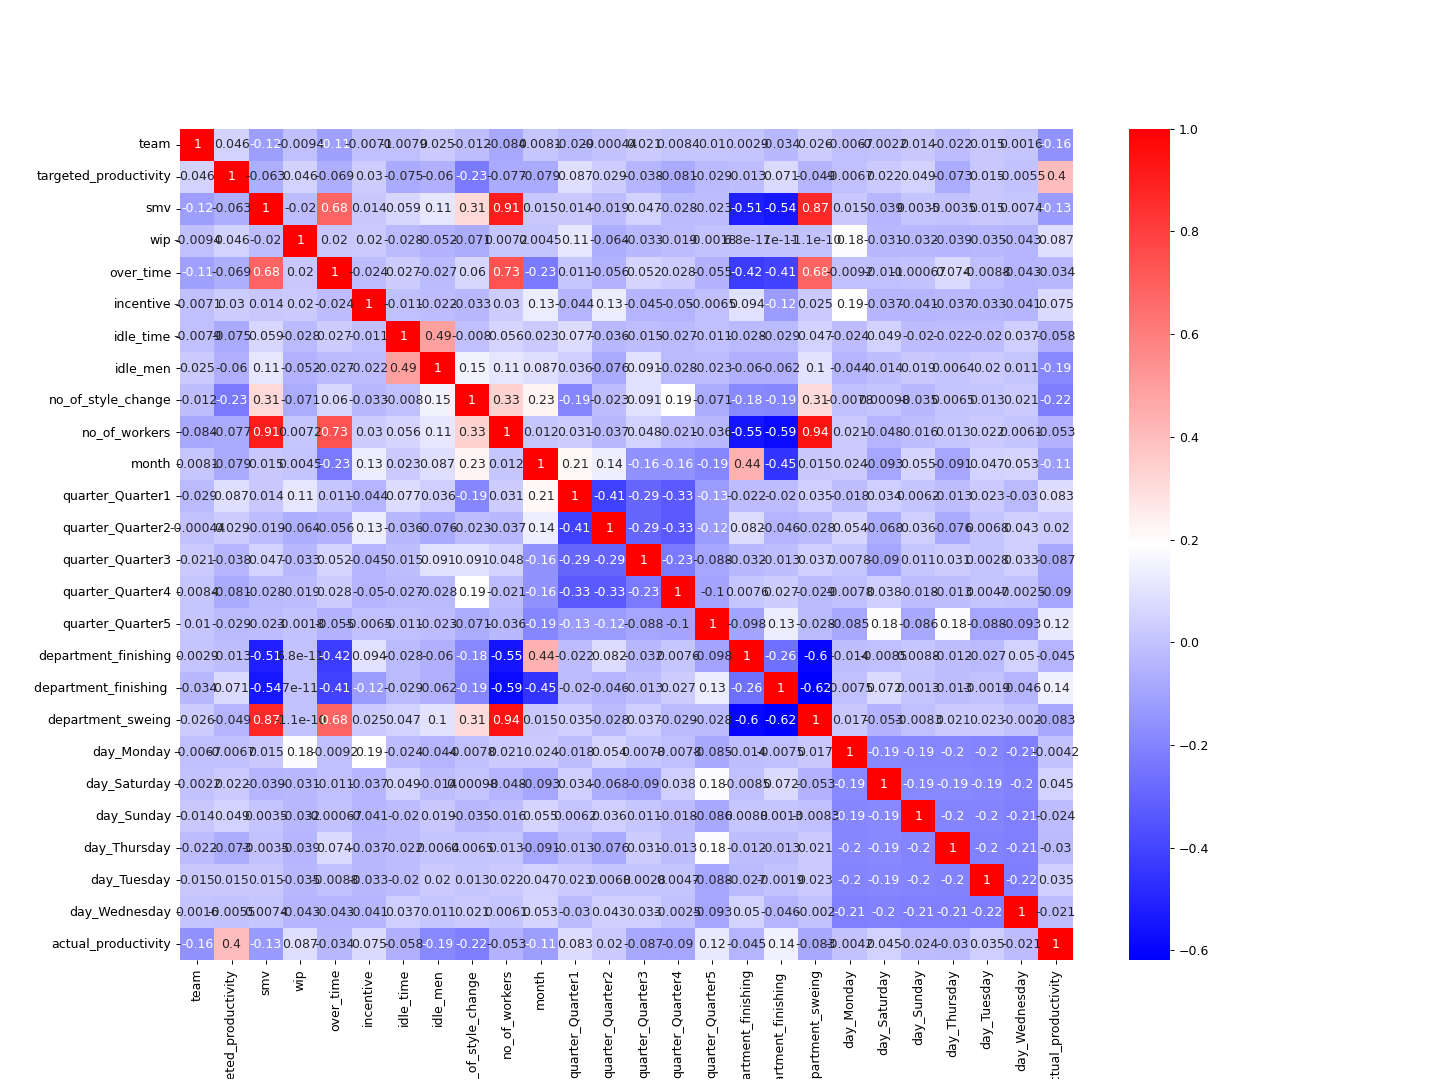

<AxesSubplot:>

In [9]:
#lets see the correlation of features with the target column i.e. actual_productivity
plt.figure(figsize=(16,12))
sns.heatmap(empl.corr(),cmap='bwr',annot=True)

In [10]:
empl_corr=empl.corr()
empl_corr['actual_productivity'].sort_values(ascending=False)

actual_productivity      1.000000
targeted_productivity    0.401069
department_finishing     0.143885
quarter_Quarter5         0.119284
wip                      0.087362
quarter_Quarter1         0.082608
incentive                0.074926
day_Saturday             0.045212
day_Tuesday              0.035301
quarter_Quarter2         0.020185
day_Monday              -0.004186
day_Wednesday           -0.020523
day_Sunday              -0.024243
day_Thursday            -0.029730
over_time               -0.033712
department_finishing    -0.045173
no_of_workers           -0.053273
idle_time               -0.058365
department_sweing       -0.083030
quarter_Quarter3        -0.086748
quarter_Quarter4        -0.089900
month                   -0.113675
smv                     -0.126243
team                    -0.155700
idle_men                -0.186789
no_of_style_change      -0.217396
Name: actual_productivity, dtype: float64

In [11]:
#the Correlation matrix shows that there is not a very high correlation between the feature columns and the target
#this rules out any possibility of using linear regression because the correlations suggest that there may not be a linear relation between any of the feature columns and the target
#also cause there are a lot of features to take care of we should use the Random Forest Regression
#Firstly, Splitting the train data into test and train sets
X=empl.drop('actual_productivity',axis=1)
y=empl['actual_productivity']
X_train,X_test,y_train,y_test=mdsel.train_test_split(X,y,test_size=0.3,random_state=0)
X_train.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
625,4,0.5,26.66,556.000000,6960,23,0.0,0,2,58.0,...,0,0,0,1,0,1,0,0,0,0
409,2,0.8,28.08,783.000000,10050,63,0.0,0,0,58.5,...,0,0,0,1,0,0,0,1,0,0
484,9,0.5,29.12,970.000000,10440,30,0.0,0,0,58.0,...,0,0,0,1,0,0,0,1,0,0
258,10,0.8,3.94,1183.183502,5400,0,0.0,0,0,20.0,...,0,0,1,0,0,0,0,0,1,0
678,3,0.7,22.52,1134.000000,8460,50,0.0,0,0,57.0,...,0,0,0,1,0,0,0,0,1,0


In [12]:
#it is a good practice to reset the indices. Therefore,
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)

y_train=y_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

X_test.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,3,0.7,22.52,1139.000000,10260,63,0.0,0,0,57.0,...,0,0,0,1,0,0,0,0,0,1
1,8,0.8,26.16,1261.000000,7080,50,0.0,0,0,59.0,...,0,0,0,1,0,1,0,0,0,0
2,5,0.7,50.89,282.000000,5880,56,0.0,0,0,59.0,...,1,0,0,1,0,1,0,0,0,0
3,8,0.7,4.15,1183.183502,960,0,0.0,0,0,8.0,...,0,1,0,0,0,1,0,0,0,0
4,8,0.5,30.10,1061.000000,6960,30,0.0,0,1,58.0,...,0,0,0,1,0,0,0,0,1,0


In [13]:
#importing the Random Forest Regressor Model and fitting it over the train dataset
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=50,random_state=0)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [14]:
#making predictions on the test features
y_pred=rfr.predict(X_test)
y_pred

array([0.77847621, 0.80325853, 0.7273962 , 0.74263581, 0.50977056,
       0.62286429, 0.68454283, 0.81021823, 0.82373318, 0.74710993,
       0.73989267, 0.77769134, 0.68446099, 0.67557018, 0.68504466,
       0.8626263 , 0.71603241, 0.69251111, 0.82693947, 0.5277592 ,
       0.66342079, 0.73830547, 0.69781486, 0.79438121, 0.82922496,
       1.00230552, 0.73546176, 0.88140984, 0.56448721, 0.77874895,
       0.67250096, 0.80013421, 0.66673798, 0.56643368, 0.61265398,
       0.80073305, 0.40320496, 0.58979305, 0.5277577 , 0.44201297,
       0.79898672, 0.86571309, 0.64594601, 0.7100192 , 0.6785656 ,
       0.76913536, 0.80518148, 0.68778186, 0.70114886, 0.49762421,
       0.75037224, 0.49208146, 0.71106301, 0.89215085, 0.66425174,
       0.53204488, 0.64833534, 0.82828392, 0.5812018 , 0.44033316,
       0.67845584, 0.75540271, 0.79538685, 0.46145662, 0.90231093,
       0.70057014, 0.75936201, 0.72988048, 0.91783023, 0.56039211,
       0.90613738, 0.71171007, 0.49982592, 0.78135797, 0.73413

In [15]:
#calculating root mean square error
rmse=np.sqrt(mtr.mean_squared_error(y_test,y_pred))
print(rmse)

#this is pretty good value 

0.1371635664520043


In [16]:
#loading the actual test data for which we cannot check the accuracy score as we are not given the values of target
test=pd.read_csv(r'E:\productivity_test.csv')
test.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,12,0.75,4.08,NaN,1080,0,0,0,0,9.0,...,1,0,1,0,0,1,0,0,0,0
1,4,0.75,4.15,NaN,2400,0,0,0,0,20.0,...,0,1,0,0,0,0,1,0,0,0
2,3,0.70,30.10,1057.0,0,40,0,0,1,58.0,...,0,0,0,1,0,0,0,0,0,1
3,7,0.70,3.94,NaN,2160,0,0,0,0,18.0,...,0,0,1,0,0,0,1,0,0,0
4,5,0.50,4.15,NaN,1440,0,0,0,0,8.0,...,0,0,1,0,0,0,1,0,0,0


In [17]:
test.shape

(180, 25)

In [18]:
#firstly, let us clean the test data
test.info()
#we see that 'wip' column has several null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   180 non-null    int64  
 1   targeted_productivity  180 non-null    float64
 2   smv                    180 non-null    float64
 3   wip                    97 non-null     float64
 4   over_time              180 non-null    int64  
 5   incentive              180 non-null    int64  
 6   idle_time              180 non-null    int64  
 7   idle_men               180 non-null    int64  
 8   no_of_style_change     180 non-null    int64  
 9   no_of_workers          180 non-null    float64
 10  month                  180 non-null    int64  
 11  quarter_Quarter1       180 non-null    int64  
 12  quarter_Quarter2       180 non-null    int64  
 13  quarter_Quarter3       180 non-null    int64  
 14  quarter_Quarter4       180 non-null    int64  
 15  quarte

In [19]:
test.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
count,180.000000,180.000000,180.000000,97.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.00000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,6.333333,0.723333,14.563167,1235.061856,4762.500000,24.205556,1.666667,0.205556,0.094444,33.27500,...,0.038889,0.244444,0.216667,0.538889,0.194444,0.177778,0.200000,0.172222,0.150000,0.105556
std,3.423546,0.100751,10.943990,2094.627651,3737.737773,29.280515,22.360680,2.757817,0.345720,22.28236,...,0.193869,0.430956,0.413123,0.499876,0.396876,0.383392,0.401116,0.378627,0.358067,0.308125
min,1.000000,0.350000,2.900000,171.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.700000,4.080000,808.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.750000,14.990000,1067.000000,3600.000000,0.000000,0.000000,0.000000,0.000000,33.00000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,0.800000,23.057500,1227.000000,7020.000000,46.250000,0.000000,0.000000,0.000000,57.00000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,0.800000,48.680000,21385.000000,25920.000000,113.000000,300.000000,37.000000,2.000000,59.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
#imputing the null values as mean of that column in column 'wip'
test=test.replace(to_replace = np.nan, value =1235.061856)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   180 non-null    int64  
 1   targeted_productivity  180 non-null    float64
 2   smv                    180 non-null    float64
 3   wip                    180 non-null    float64
 4   over_time              180 non-null    int64  
 5   incentive              180 non-null    int64  
 6   idle_time              180 non-null    int64  
 7   idle_men               180 non-null    int64  
 8   no_of_style_change     180 non-null    int64  
 9   no_of_workers          180 non-null    float64
 10  month                  180 non-null    int64  
 11  quarter_Quarter1       180 non-null    int64  
 12  quarter_Quarter2       180 non-null    int64  
 13  quarter_Quarter3       180 non-null    int64  
 14  quarter_Quarter4       180 non-null    int64  
 15  quarte

In [21]:
#now we can make predictions on this cleaned data
predictions=(rfr.predict(test))

In [22]:
#the the data type of the predictions is a numpy array, we must convert it into a dataframe
predictions_df=pd.DataFrame(predictions)
predictions_df.index=test.index
predictions_df.columns=['actual_productivity']
predictions_df.head()

,actual_productivity
0,0.777686
1,0.877364
2,0.745033
3,0.725389
4,0.629298


In [23]:
#saving the predictions dataframe as a csv file to be uploaded
predictions_df.to_csv("prediction_results.csv", index = False)